# Importing libraries and inputting dataframe

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import Button, Slider
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets

In [15]:
df_unfiltered_0 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output54661_updated.csv')

df_unfiltered_1 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output65692.csv')

df_unfiltered_2 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output34266.csv')

df_unfiltered_3 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output56546_Apr5_.csv')

df_unfiltered_4 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output11548_Apr8_.csv')

df_unfiltered_5 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output23100_Apr9_.csv')

df_unfiltered_6 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output33431_Apr26_.csv')

df_unfiltered_7 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output10342_Apr30_.csv')

df_unfiltered_8 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output4_May26_.csv')

df_unfiltered = pd.concat([df_unfiltered_0, df_unfiltered_1, df_unfiltered_2, df_unfiltered_3, df_unfiltered_4, df_unfiltered_5, df_unfiltered_6, df_unfiltered_7, df_unfiltered_8], axis=0)


In [16]:
# Consider only the cases where depth_top_res >= 1000, to respect the pressure and temperature constraints in CCSNet

filters = (df_unfiltered.depth_top_res >= 800) & (df_unfiltered['thick_res'] / df_unfiltered['inj_rate'] >= 100)

df = df_unfiltered[filters]

df = df.sort_values(by=['rho_brine', 'inj_rate', 'depth_bottom_usdw', 'depth_top_res', 'thick_res', 'perm_res'])

In [17]:
df['plume_rad'] = df['plume_rad'] / 1000 # converting m to km

df['pressure_front_rad'] = df['pressure_front_rad'] / 1000 # converting m to km

df['AoR_rad'] = df[['plume_rad', 'pressure_front_rad']].max(axis=1) # AoR - max of plume radius and pressure front radius

df['depth_diff'] = df['depth_top_res'] - df['depth_bottom_usdw'] # depth difference in m

df

,Unnamed: 0.1,Unnamed: 0,rho_brine,inj_rate,geo_grad,depth_bottom_usdw,depth_top_res,thick_res,perm_res,p_crit,plume_rad,pressure_front_rad,AoR_rad,depth_diff
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,30.0,1.372,2.018407,11.348754,11.348754,700.0
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,50.0,1.372,2.169525,12.594156,12.594156,700.0
1,NaN,1,1020.0,0.25,25,100.0,800.0,50.0,50.0,1.372,2.169525,12.594156,12.594156,700.0
2,NaN,2,1020.0,0.25,25,100.0,800.0,50.0,70.0,1.372,2.249075,12.594156,12.594156,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23098,NaN,23098,1100.0,2.00,25,350.0,1800.0,200.0,800.0,14.210,4.741633,0.000100,4.741633,1450.0
23099,NaN,23099,1100.0,2.00,25,350.0,1800.0,200.0,850.0,14.210,4.741633,0.000100,4.741633,1450.0
33428,NaN,33428,1100.0,2.00,25,350.0,1800.0,200.0,900.0,14.210,4.741633,0.000100,4.741633,1450.0
33429,NaN,33429,1100.0,2.00,25,350.0,1800.0,200.0,950.0,14.210,4.911238,0.000100,4.911238,1450.0


In [18]:
# Verifying unique values in each column

print('rho_brine', df.rho_brine.unique())
print('inj_rate', df.inj_rate.unique())
print('geo_grad', df.geo_grad.unique())
print('depth_bottom_usdw', df.depth_bottom_usdw.unique())
print('depth_top_res', df.depth_top_res.unique())
print('thick_res', df.thick_res.unique())
print('perm_res', df.perm_res.unique())

rho_brine [1020. 1040. 1060. 1080. 1100.]
inj_rate [0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
geo_grad [25]
depth_bottom_usdw [100. 150. 200. 250. 300. 350.]
depth_top_res [ 800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800.]
thick_res [ 50.  75. 100. 125. 150. 175. 200.]
perm_res [  10.   30.   50.   70.   90.  100.  150.  200.  250.  300.  350.  400.
  450.  500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


# Defining functions to plot

In [19]:
def plume_perm_plot(rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['perm_res'], filtered_df['plume_rad'], label='CO2 Plume')
    # plt.plot(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['perm_res'], filtered_df['AoR_rad'], '--',label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['perm_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['perm_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Permeability (mD)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs permeability')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_rho_brine_plot(perm_res=10, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['rho_brine'], filtered_df['plume_rad'], label='CO2 Plume')
    # plt.plot(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['rho_brine'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['rho_brine'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['rho_brine'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Density of brine (kg/m3)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs density of brine')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


def plume_inj_rate_plot(perm_res=10, rho_brine=1020, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['inj_rate'], filtered_df['plume_rad'], label='CO2 plume')
    # plt.plot(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['inj_rate'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['inj_rate'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['inj_rate'], filtered_df['AoR_rad'], label='Area of Review')
    plt.ylim(0, y_lim)
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.xlabel('Injection rate (MT/year)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs injection rate')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_geo_grad_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['geo_grad'], filtered_df['plume_rad'], label='CO2 plume')
    # plt.plot(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['geo_grad'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['geo_grad'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['geo_grad'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Geothermal gradient (oc/km)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs geothermal gradient')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_depth_bottom_usdw_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['plume_rad'], label='CO2 plume')
    # plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Depth to bottom of USDW (m)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs depth to bottom of USDW')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


def plume_depth_top_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['depth_top_res'], filtered_df['plume_rad'], label='CO2 plume')
    # plt.plot(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['depth_top_res'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Depth to top of reservoir (m)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs depth to top of reservoir')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_thick_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['thick_res'], filtered_df['plume_rad'], label='CO2 plume')
    # plt.plot(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.plot(filtered_df['thick_res'], filtered_df['AoR_rad'], '--', label='Area of Review')
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['thick_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['thick_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xlabel('Thickness of reservoir (m)')
    plt.ylabel('Radius (km)')
    plt.title('Radius vs thickness of reservoir')
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


# Plots

## Radius vs permeability

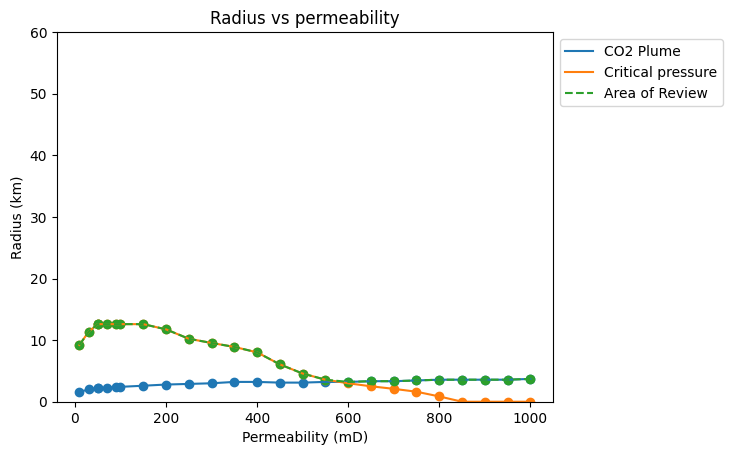

interactive(children=(IntSlider(value=1020, description='rho_brine', max=1100, min=1020, step=20), FloatSlider…

<function __main__.plume_perm_plot(rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [21]:
# widgets.interact(plume_perm_plot, rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 28, 2.5), depth_bottom_usdw=(100, 250, 50),
#                  depth_top_res=(1000, 1800, 400), thick_res=(50, 200, 50), y_lim=(5, 60, 5))

widgets.interact(plume_perm_plot, rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs injection rate

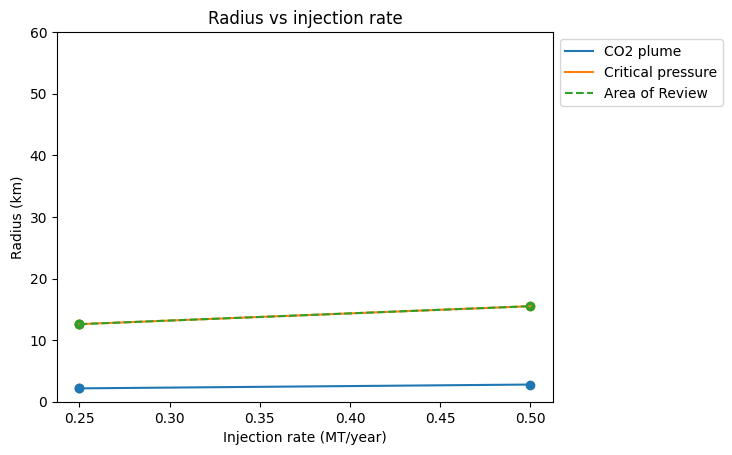

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_inj_rate_plot(perm_res=10, rho_brine=1020, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [22]:
# widgets.interact(plume_inj_rate_plot, perm_res=[10, 50, 100, 250, 500, 1000], rho_brine=(1020, 1100, 20), geo_grad=(23, 28, 2.5), depth_bottom_usdw=(100, 250, 50),
#                  depth_top_res=(1000, 1800, 400), thick_res=(50, 200, 50), y_lim=(5, 60, 5))
# perm_res=(50, 1000, 50)
# perm_res=[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

widgets.interact(plume_inj_rate_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs density of brine

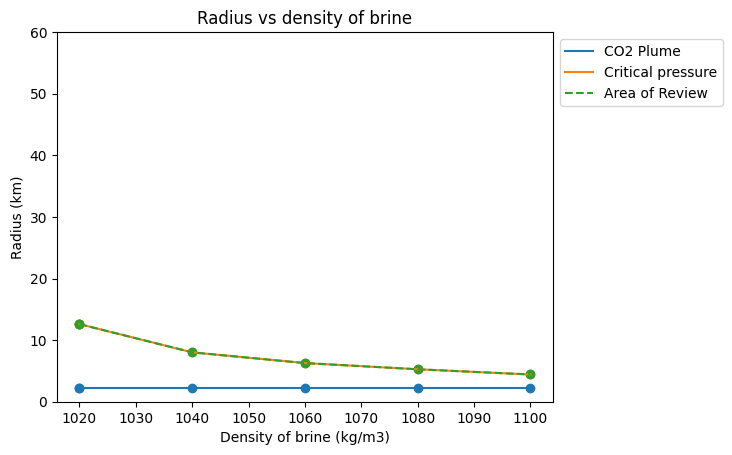

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), FloatSlider(valu…

<function __main__.plume_rho_brine_plot(perm_res=10, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [23]:
# widgets.interact(plume_rho_brine_plot, perm_res=[10, 50, 100, 250, 500, 1000], inj_rate=(0.25, 2, 0.25), geo_grad=(23, 28, 2.5), depth_bottom_usdw=(100, 250, 50),
#                  depth_top_res=(1000, 1800, 400), thick_res=(50, 200, 50), y_lim=(5, 60, 5))

widgets.interact(plume_rho_brine_plot, perm_res=(50, 1000, 50), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs geothermal gradient

In [24]:
# widgets.interact(plume_geo_grad_plot, perm_res=[10, 50, 100, 250, 500, 1000], rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), depth_bottom_usdw=(100, 250, 50),
#                  depth_top_res=(1000, 1800, 400), thick_res=(50, 200, 50), y_lim=(5, 60, 5))

## Radius vs depth to bottom of USDW

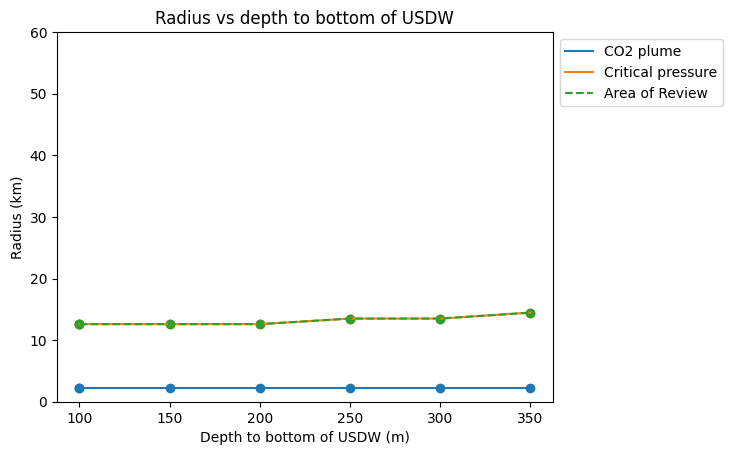

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_depth_bottom_usdw_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_top_res=800, thick_res=50, y_lim=60)>

In [25]:
# widgets.interact(plume_depth_bottom_usdw_plot, perm_res=[10, 50, 100, 250, 500, 1000], rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 28, 2.5),
#                  depth_top_res=(1000, 1800, 400), thick_res=(50, 200, 50), y_lim=(5, 60, 5))

widgets.interact(plume_depth_bottom_usdw_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs depth to top of reservoir

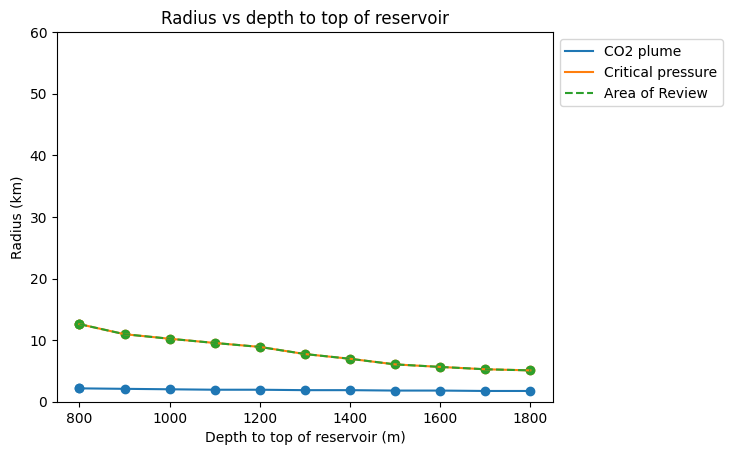

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_depth_top_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, thick_res=50, y_lim=60)>

In [26]:
# widgets.interact(plume_depth_top_res_plot, perm_res=[10, 50, 100, 250, 500, 1000], rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 28, 2.5),
#                  depth_bottom_usdw=(100, 250, 50), thick_res=(50, 200, 50), y_lim=(5, 60, 5))

widgets.interact(plume_depth_top_res_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_bottom_usdw=(100, 350, 50), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs thickness of reservoir

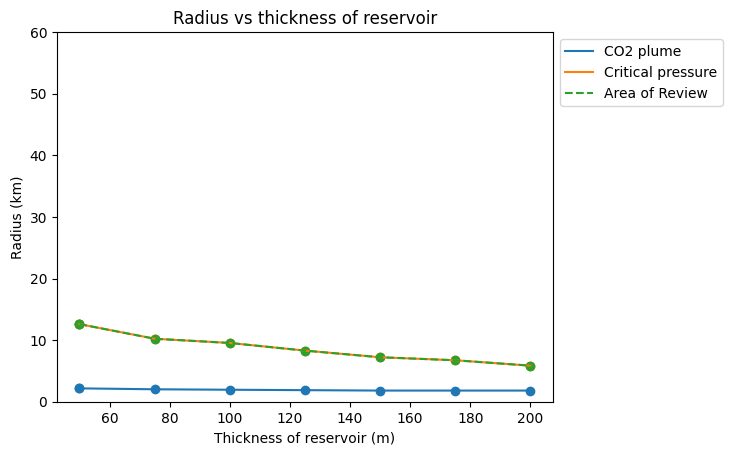

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_thick_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, y_lim=60)>

In [27]:
widgets.interact(plume_thick_res_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_bottom_usdw=(100, 350, 50), depth_top_res=(800, 1800, 100), y_lim=(5, 60, 5))

## Nomograph

In [28]:
df['ra_by_rp'] = df['AoR_rad'] / df['plume_rad']

df['kh_by_Q'] = 9.869233e-16 * df['perm_res'] * df['thick_res'] / df['inj_rate']

df['rho_brine_minus_rho_water'] = df['rho_brine'] - 1000

df['z_delta_rho_g'] = df['depth_diff'] * df['rho_brine_minus_rho_water'] * 9.81 / 1e5 # pressure buildup required for leakage in bar

df

,Unnamed: 0.1,Unnamed: 0,rho_brine,inj_rate,geo_grad,depth_bottom_usdw,depth_top_res,thick_res,perm_res,p_crit,plume_rad,pressure_front_rad,AoR_rad,depth_diff,ra_by_rp,kh_by_Q,rho_brine_minus_rho_water,z_delta_rho_g
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0,5.888921,1.973847e-12,20.0,1.3734
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,30.0,1.372,2.018407,11.348754,11.348754,700.0,5.622628,5.921540e-12,20.0,1.3734
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,50.0,1.372,2.169525,12.594156,12.594156,700.0,5.805030,9.869233e-12,20.0,1.3734
1,NaN,1,1020.0,0.25,25,100.0,800.0,50.0,50.0,1.372,2.169525,12.594156,12.594156,700.0,5.805030,9.869233e-12,20.0,1.3734
2,NaN,2,1020.0,0.25,25,100.0,800.0,50.0,70.0,1.372,2.249075,12.594156,12.594156,700.0,5.599706,1.381693e-11,20.0,1.3734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23098,NaN,23098,1100.0,2.00,25,350.0,1800.0,200.0,800.0,14.210,4.741633,0.000100,4.741633,1450.0,1.000000,7.895386e-11,100.0,14.2245
23099,NaN,23099,1100.0,2.00,25,350.0,1800.0,200.0,850.0,14.210,4.741633,0.000100,4.741633,1450.0,1.000000,8.388848e-11,100.0,14.2245
33428,NaN,33428,1100.0,2.00,25,350.0,1800.0,200.0,900.0,14.210,4.741633,0.000100,4.741633,1450.0,1.000000,8.882310e-11,100.0,14.2245
33429,NaN,33429,1100.0,2.00,25,350.0,1800.0,200.0,950.0,14.210,4.911238,0.000100,4.911238,1450.0,1.000000,9.375771e-11,100.0,14.2245


Text(0.5, 0, 'kh/Q')

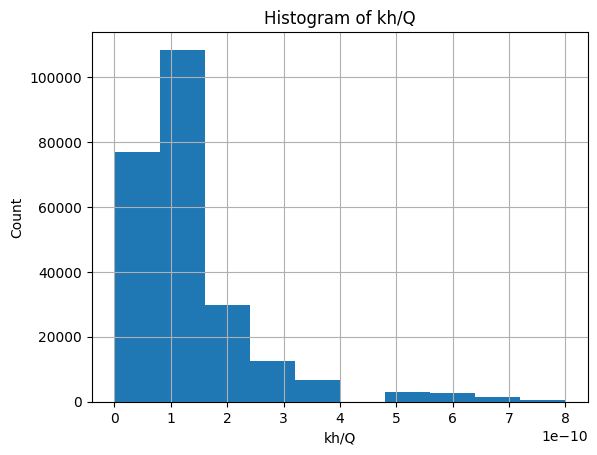

In [29]:
df['kh_by_Q'].round(10).hist()
plt.title('Histogram of kh/Q')
plt.ylabel('Count')
plt.xlabel('kh/Q')

In [30]:
df['kh_by_Q'].round(10).unique()

array([0.e+00, 1.e-10, 2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10,
       8.e-10])

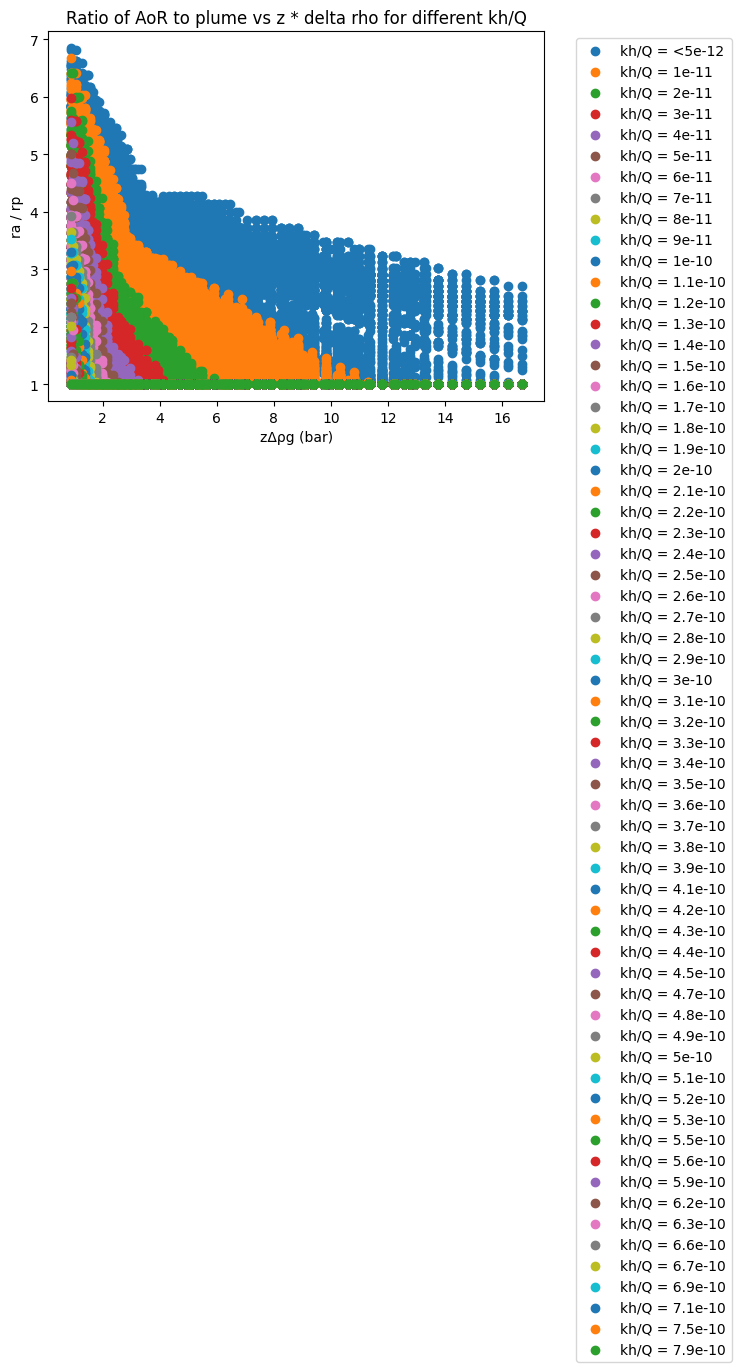

In [31]:
# try round(11) or round(12) for finer resolution

for kh_by_q in np.sort(df['kh_by_Q'].round(11).unique())[0:]:

  filter = (df['kh_by_Q'].round(11) == kh_by_q)

  if kh_by_q == 0:
    kh_by_q = '<5e-12'

  # filter = (np.isclose(df['kh_by_Q'], 10e-9))

  # df[filter].plot.scatter(x='z_delta_rho', y='ra_by_rp')
  # plt.figure()
  plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['ra_by_rp'], label='kh/Q = ' + str(kh_by_q), alpha=1)
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel('zΔρg (bar)')
  plt.ylabel('ra / rp')
  plt.title('Ratio of AoR to plume vs z * delta rho for different kh/Q')

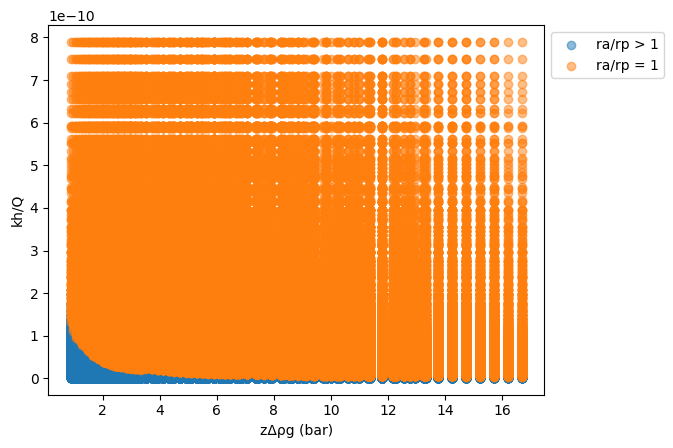

In [32]:
filter1 = (df['ra_by_rp'] > 1.0000)
filter2 = (df['ra_by_rp'] == 1.0000)

# plt.figure()
plt.scatter(df[filter1]['z_delta_rho_g'], df[filter1]['kh_by_Q'], label='ra/rp > 1', alpha=0.5)
plt.xlabel('zΔρg (bar)')
plt.ylabel('kh/Q')
# plt.title('ra/rp >1')

#plt.figure()
plt.scatter(df[filter2]['z_delta_rho_g'], df[filter2]['kh_by_Q'], label='ra/rp = 1', alpha=0.5)
# plt.xlabel('z * delta rho')
# plt.ylabel('kh/Q')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
# plt.title('ra/rp = 1')

In [33]:
print('Pressure governed', len(df[filter1]))
print('Plume governed', len(df[filter2]))

Pressure governed 35170
Plume governed 206395
